In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
df1 = pd.read_csv('Outlet-x.csv') # Reading Data
df2 = pd.read_csv('Outlet-y.csv')
df3 = pd.read_csv('Outlet-z.csv')

df1 = df1.head(25891)
df2 = df2.head(50720)
df3 = df3.head(31820)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True)
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)

# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3]
d = pd.concat(frames) # Combining all the outlets

# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')
p.head(30)

TransactionDateTime1           0       1       2       3       4       5   \
OutletNumber PumpNumber1                                                    
Outlet-x     2                NaN     NaN     NaN     NaN     NaN     NaN   
             4                NaN     NaN     NaN     NaN     NaN     NaN   
             6                NaN     NaN     NaN     NaN     NaN     NaN   
             7                NaN     NaN     NaN     NaN     NaN     NaN   
             10               NaN     NaN     NaN     NaN     NaN     NaN   
Outlet-y     2            1062.94  289.21   15.56   13.36   35.14  190.29   
             4            1213.36  913.44  839.92  473.57  490.98  728.28   
             6                NaN     NaN     NaN     NaN     NaN     NaN   
             7                NaN     NaN     NaN     NaN     NaN     NaN   
             8                NaN     NaN     NaN     NaN     NaN     NaN   
Outlet-z     2                NaN     NaN     NaN     NaN     NaN     NaN   
             3                NaN     NaN     NaN     NaN     NaN     NaN   
             6                NaN     NaN     NaN     NaN     NaN     NaN   
             7                NaN     NaN     NaN     NaN     NaN     NaN   
             11               NaN     NaN     NaN     NaN     NaN     NaN   

TransactionDateTime1           6        7        8        9   ...       14  \
OutletNumber PumpNumber1                                      ...            
Outlet-x     2              22.90   523.28   800.54  1382.39  ...  1182.52   
             4              13.92   205.07  1172.37  1556.72  ...  1527.17   
             6                NaN    26.56   686.30  1233.53  ...   719.92   
             7             127.15  1316.44  1790.77  2367.25  ...  1719.26   
             10               NaN    58.45   712.54  1473.54  ...  1820.39   
Outlet-y     2             607.05   413.52   559.35   909.99  ...  1124.78   
             4            1084.02   686.87   950.40  1305.57  ...  1759.29   
             6                NaN   156.44   420.04   572.34  ...  2518.97   
             7                NaN   749.79  1508.26  1993.66  ...  1101.91   
             8                NaN   480.28  1099.50  1381.29  ...   693.72   
Outlet-z     2               1.40   904.49  1667.63  2604.39  ...  2098.15   
             3               1.02   761.76  1157.55  1691.48  ...  1133.56   
             6               0.00  1048.59  1561.90  2489.48  ...  1336.67   
             7               3.17  1009.86  1602.13  1697.56  ...   533.72   
             11              7.63   711.82  1240.82  1868.36  ...  1395.19   

TransactionDateTime1           15       16       17       18       19  \
OutletNumber PumpNumber1                                                
Outlet-x     2            1175.76  1093.13  1341.73  1754.91  1669.22   
             4            1020.11  1685.76  1983.74  2344.76  2070.07   
             6             684.12  1071.79   957.38   681.88  1105.67   
             7            1683.91  1728.10  2044.91  2253.85  2278.05   
             10           1862.55  1975.49  2615.89  1889.80  2113.03   
Outlet-y     2            1007.02   693.59   786.14   915.30   607.98   
             4            1298.43   926.23   752.58   957.64  1007.65   
             6             566.97   412.16   496.59   470.05   708.82   
             7            1632.06  1779.80  2026.61  2340.74  1914.05   
             8            1523.50  1796.51  1897.83  2127.76  1979.49   
Outlet-z     2            1765.72  1616.21  1563.61  1608.80  1064.36   
             3            1021.53   971.04  1069.03  1359.66  1396.48   
             6            1280.25  1665.14  1694.71  2013.72  1426.27   
             7             356.55   770.09  1137.61  1502.83  1657.82   
             11           1370.15  1267.58  1223.79  1380.04  1209.94   

TransactionDateTime1           20       21       22       23  
OutletNumber PumpNumber1                                  

In [5]:
p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00

da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 

otx = c.loc[c['OutletNumber'] == 'Outlet-x'] # Seperating outlet wise data
oty = c.loc[c['OutletNumber'] == 'Outlet-y']
otz = c.loc[c['OutletNumber'] == 'Outlet-z']
otz
#c.head(30)

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
10,Outlet-z,2,3287.08,10
11,Outlet-z,3,1848.13,10
12,Outlet-z,6,3229.95,10
13,Outlet-z,7,2113.75,10
14,Outlet-z,11,2095.71,11


In [7]:
# Sort the data on maximum volume of each outlet peak hour
c.sort_values(['Quantity1'], axis = 0, ascending = False, inplace = True)
c4 = c.groupby('OutletNumber').first().reset_index()
c4 = pd.DataFrame(c4)
c4.head(10)

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-x,10,3284.58,11
1,Outlet-y,6,2518.97,14
2,Outlet-z,2,3287.08,10


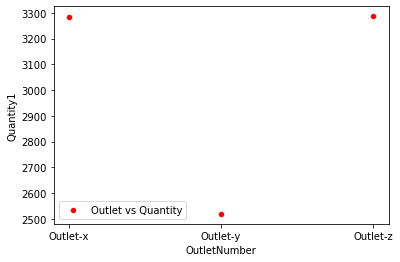

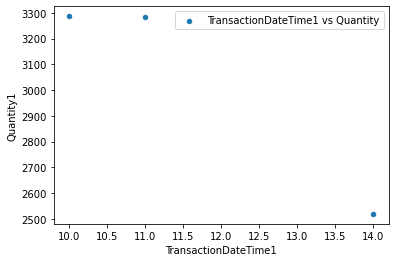

In [7]:
# Visual representation of data
ax = c4.plot(kind= 'scatter', x = 'OutletNumber', y = 'Quantity1', color = 'r', label ='Outlet vs Quantity')
c4.plot(kind = 'scatter', x = 'TransactionDateTime1', y = 'Quantity1', label = 'TransactionDateTime1 vs Quantity')

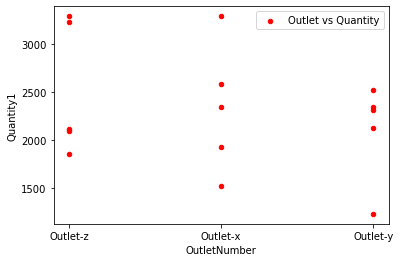

In [8]:
c.plot(kind= 'scatter', x = 'OutletNumber', y = 'Quantity1', color = 'r', label ='Outlet vs Quantity')

In [11]:
# Individual Trade Area Clustering
x = c4.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=2)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)

[1 0 1]


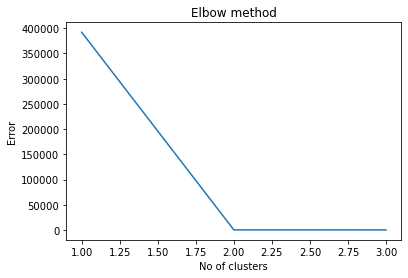

In [12]:
# Elbow Method to determine the number of clusters
Error =[]
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 4), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

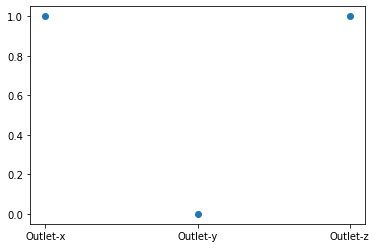

In [13]:
x1 = c4['OutletNumber']
y1 = y_kmeans
plt.scatter(x1, y1, cmap = 'rainbow') # clustered data plot of individual outlet

Text(0, 0.5, 'Time of Hour')

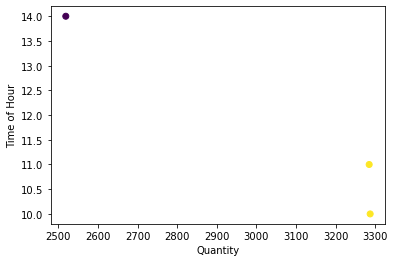

In [14]:
plt.scatter(x[:, 1], x[:, 2], c = y_kmeans)
plt.xlabel('Quantity')
plt.ylabel('Time of Hour')

In [15]:
print('****Outlet-x Median:', otx['Quantity1'].median()) # Individual Outlet Median
otx.head(5)

****Outlet-x Median: 2344.7599999999993


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-x,2,1923.18,11
1,Outlet-x,4,2344.76,18
2,Outlet-x,6,1521.30,10
3,Outlet-x,7,2578.00,10
4,Outlet-x,10,3284.58,11


In [16]:
print('****Outlet-y Median:', oty['Quantity1'].median()) # Individual Outlet Median
oty.head(5)

****Outlet-y Median: 2314.099999999999


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
5,Outlet-y,2,1228.97,23
6,Outlet-y,4,2314.10,13
7,Outlet-y,6,2518.97,14
8,Outlet-y,7,2340.74,18
9,Outlet-y,8,2127.76,18


In [17]:
print('****Outlet-z Median:', otz['Quantity1'].median()) # Individual Outlet Median
otz.head(5)

****Outlet-z Median: 2113.749999999989


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
10,Outlet-z,2,3287.08,10
11,Outlet-z,3,1848.13,10
12,Outlet-z,6,3229.95,10
13,Outlet-z,7,2113.75,10
14,Outlet-z,11,2095.71,11
